# Import data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_science_job.csv')
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
12144,6146,city_160,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,7.0,1000-4999,Pvt Ltd,102.0,0.0
2731,4675,city_11,0.550,Male,No relevent experience,Full time course,High School,NaN,4.0,NaN,NaN,23.0,0.0
11701,21113,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,NaN,NaN,184.0,1.0
15799,10659,city_65,0.802,NaN,Has relevent experience,no_enrollment,Graduate,STEM,15.0,100-500,Pvt Ltd,156.0,0.0
15577,4939,city_103,0.920,Male,Has relevent experience,Full time course,Phd,STEM,14.0,NaN,Public Sector,29.0,0.0


## CCA


- **Assumption**:
  - MCAR : Missing Complete At Random
  - less than 5%

- **Best Practices**:
  - Draw before after viz

In [4]:
# % of data is missing
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

In [9]:
# condition for less than 5% and greater than 0%

cols = [ var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
13484,0.624,no_enrollment,Masters,20.0,11.0
1897,0.897,no_enrollment,Masters,9.0,47.0
4954,0.910,Full time course,Graduate,9.0,55.0
4040,0.920,Full time course,Graduate,4.0,131.0
4696,0.913,no_enrollment,Graduate,9.0,54.0


In [ ]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [16]:
print( f" After removing the nan value according to condition we have ", (len(df[cols].dropna())) / (len(df)) * 100, "% data")

 After removing the nan value according to condition we have  89.68577095730244 % data


In [17]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

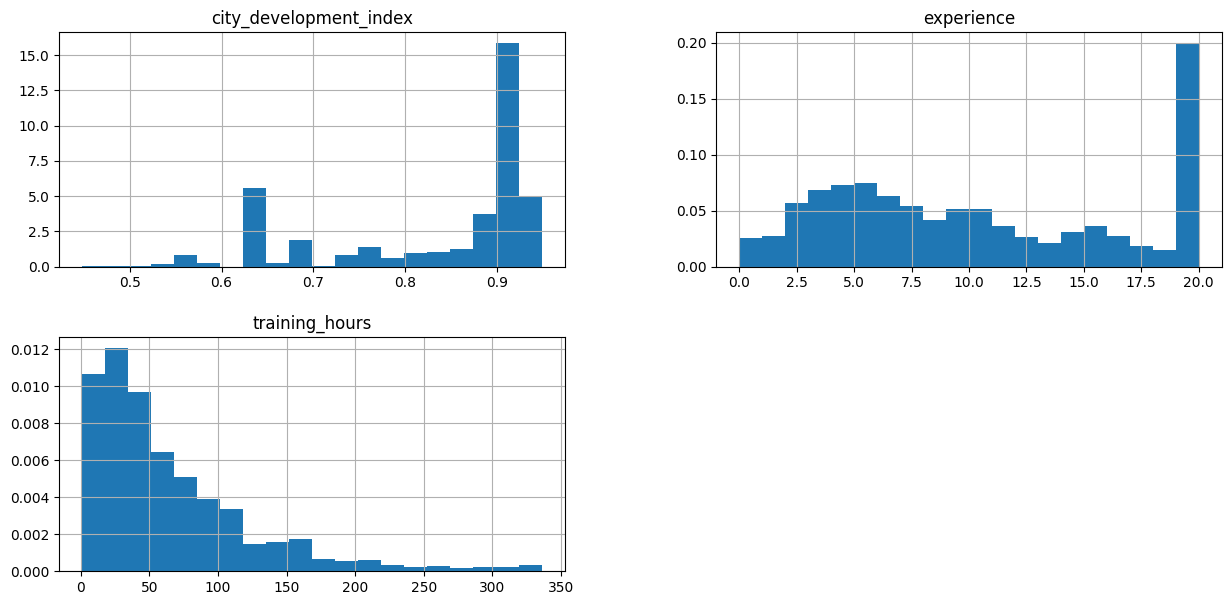

In [23]:
new_df.hist(bins=20, density=True, figsize=(15, 7))
plt.show()

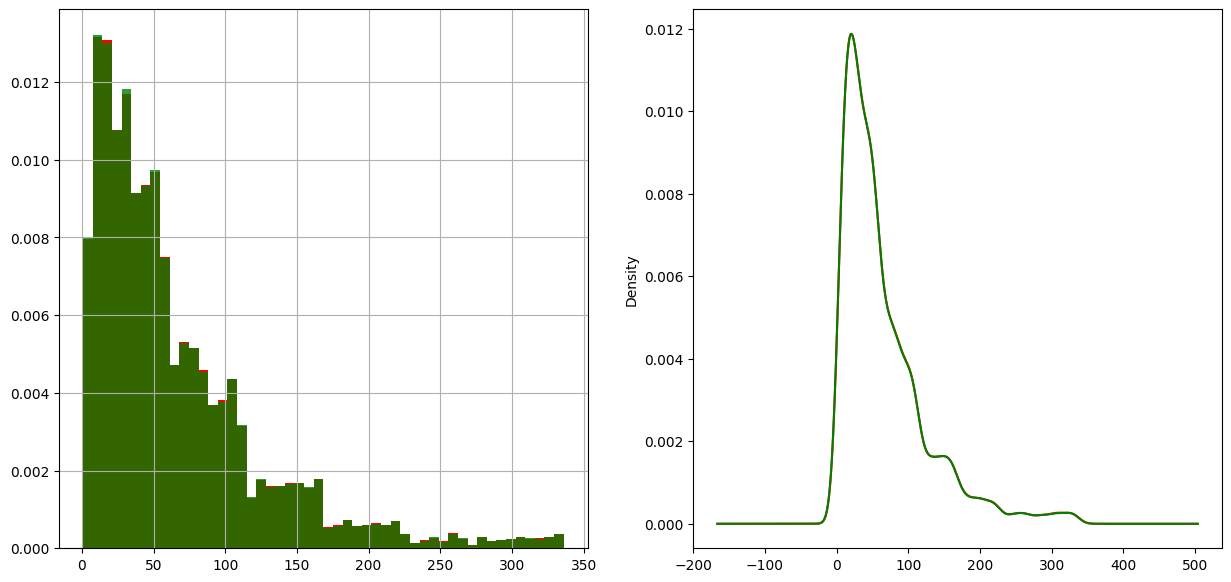

In [42]:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(121)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)



ax1 = fig.add_subplot(122)
# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

plt.show()

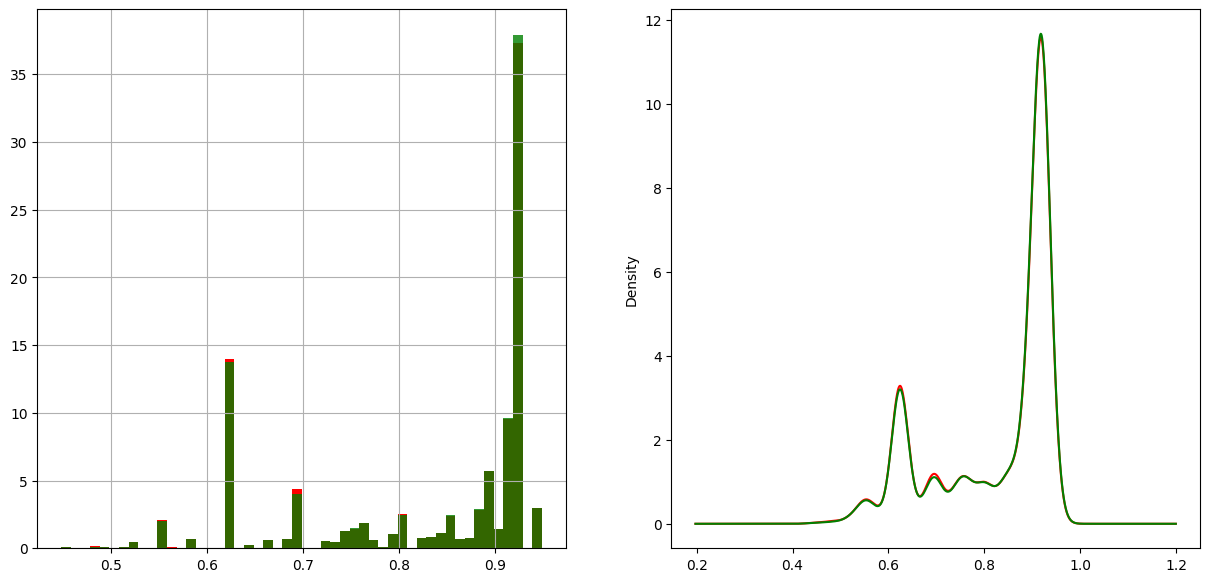

In [41]:
fig = plt.figure(figsize=(15, 7))

ax = fig.add_subplot(121)
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


ax = fig.add_subplot(122)
df['city_development_index'].plot.density(color='red')
new_df['city_development_index'].plot.density(color='green')

plt.show()

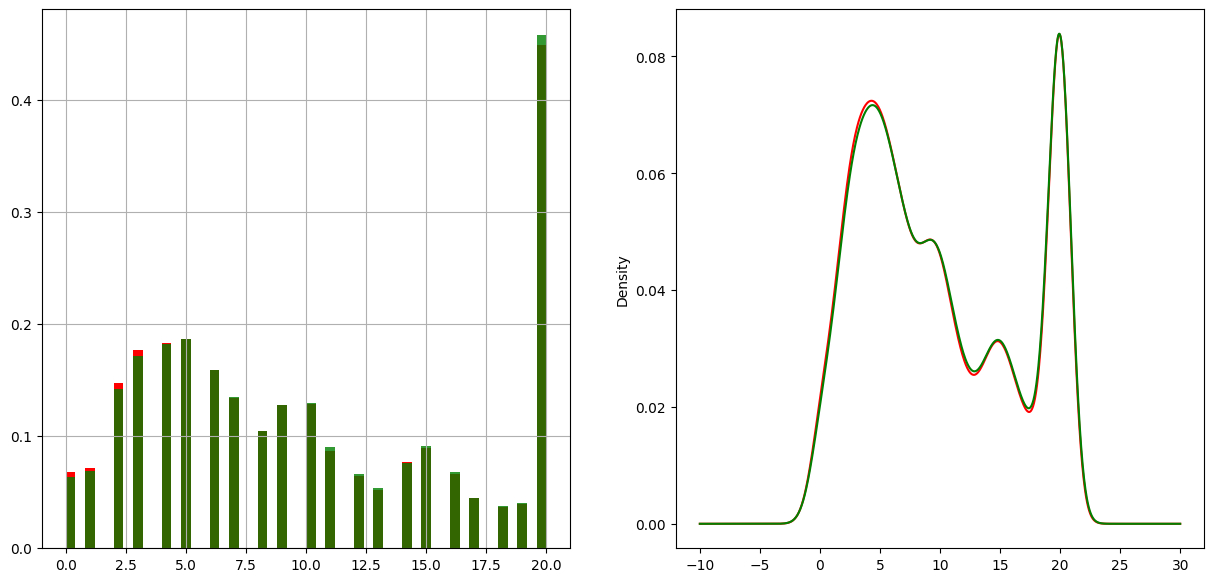

In [40]:
fig = plt.figure(figsize=(15, 7))

ax = fig.add_subplot(121)
df['experience'].hist(bins=50, ax=ax, density=True, color='red')
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


ax = fig.add_subplot(122)
df['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='green')

plt.show()

In [43]:
# After and before how much data is removed
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [44]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
